In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
x = iris.data[:,[2,3]]
y=iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1,stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X_train)
X_train_sd = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train_sd,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt



def plot_decision_regions(X, y , classifier, test_idx =None, resolution=0.02):
    
    
    # setup marker colors map
    markers = ('s','x','o','^','v')
    colors = ('red','blue', 'lightgreen',' gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    
    x1_min, x1_max = X[:,0].min()-1 , X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1 , X[:,1].max()+1
    
    xx1 , xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x= X[y==cl, 0], y=X[y==cl,1], alpha =0.8, c = colors[idx],
                   marker = markers[idx], label=cl,
                   edgecolor='black')
    
    #highlight test samples
    
    if test_idx:
        
        X_test, y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c = '',
                   marker = 'o', alpha=1 ,label='test_set',
                   edgecolor='black', linewidth=1)

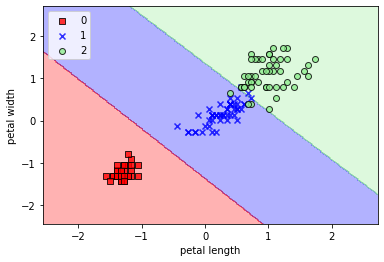

In [7]:
X_combined_std = np.vstack((X_train_sd, X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,100))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

The upper example was for linear seperable dataset but for linearly inseparable data we can use kernel methods


We will create a simple dataset that has the form of an XOR gate using logical_or function from Numpy, where 100
samples will be assigned the class label 1 and 100 sample will be assigned the class label -1:

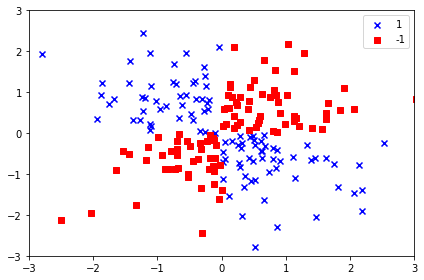

In [8]:

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()

plt.show()

this is not possible to linearly separate.The basic idea behind kernel methods to deal with
such linearly insperable data is to create nonlineaer combinations of the original features to project
them onto higher dimension.We can tranform the dataset from 2D to 3D where the classes become separable


To solve a nonlinear problem, we can transform feature into higher dimension
via mapping function which is very expensive in terms of computation. This where kernel trick comes into play


reference :https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d
Let’s look at an example:

Here x and y are two data points in 3 dimensions. 

    x =(x1,x2,x3)^T
    y =(y1,y2,y3)^T
    
Let’s assume that we need to map x and y to 9-dimensional space.
We need to do the following calculations to get the final result, which is just a scalar. 
The computational complexity, in this case, is O(n²).

    
However, if we use the kernel function, which is denoted as k(x, y), 
instead of doing the complicated computations in the 9-dimensional space, 
we reach the same result within the 3-dimensional space by calculating the dot product of x -transpose and y. 
The computational complexity, in this case, is O(n).
    k(x,y)= (x^T*y)^2
In essence, what the kernel trick does for us is to offer a more efficient and less expensive
way to transform data into higher dimensions. With that saying, 
the application of the kernel trick is not limited to the SVM algorithm
. Any computations involving the dot products (x, y) can utilize the kernel trick.

Different kernel functions
There are different kernels. 
The most popular ones are the polynomial kernel and the radial basis function (RBF) kernel.
“Intuitively, the polynomial kernel looks not only at the given features of input samples
to determine their similarity, but also combinations of these” (Wikipedia), just like the example above. 
With n original features and d degrees of polynomial, the polynomial kernel yields n^d expanded features.

The format of polynomial kernel
The RBF kernel is also called the Gaussian kernel. 
There is an infinite number of dimensions in the feature space because it can be expanded by the Taylor Series. 
In the format below, The γ parameter defines how much influence a single training example has.
The larger it is, the closer other examples must be to be affected (sklearn documentation).
        k(x,y)=exp(-gamma||x-y||^2)
The format of the RBF kernel
There are different options for the kernel functions in the sklearn library in Python. You can even build a custom kernel if needed.


the term kernel can be interpreted as a similarity function between a pair of sample.
The minus sign inverts the distance measure into a similarity score, and due to the exponential term, the
resulting similarity score will fall intp range between 1 and 0

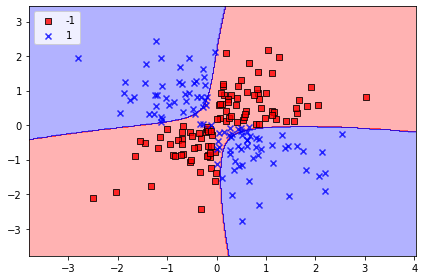

In [9]:

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

the gamma parameter which we set tp 0.1 can be understood as a cut off parameter
if we increase it the influence or reach of the training smaple leads to tighter decesion boundary


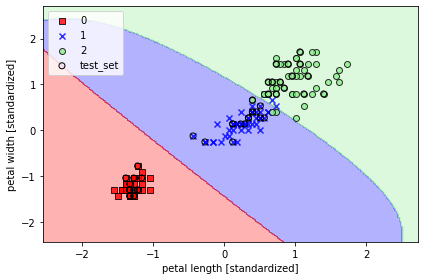

In [10]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_sd, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

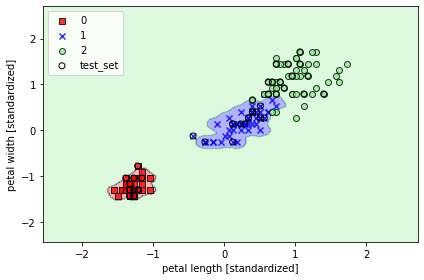

In [11]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_sd, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

it means it gamma value control overfitting